# thinking1

# thinking2

# thinking3

# action1

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt

In [3]:
G = nx.read_gml('G:/project_courseware/核心班BI/lesson12/L12/dolphins/dolphins.gml')

In [18]:
#对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos)
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

In [19]:
G = nx.read_gml('G:/project_courseware/核心班BI/lesson12/L12/dolphins/dolphins.gml')

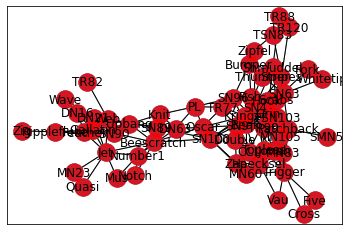

In [21]:
# 可视化
plot_graph(G)

In [23]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [24]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [25]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [26]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[-1.44653910e+00  1.22753990e+00 -4.52593098e-01  4.95023822e-01]
 [-4.05096362e-01 -9.05074960e-02  6.21288979e-01 -1.05451123e+00]
 [ 8.65998849e-01  7.33828280e-01 -3.54566877e-02 -6.24249381e-01]
 [ 3.48262060e-01 -2.13115480e+00 -1.84307873e+00 -3.77554212e-02]
 [ 3.52361199e-01 -4.30535995e-01  3.00181011e-01 -1.19157336e+00]
 [-2.85959424e+00 -3.86753394e-01 -3.73652360e-01 -8.19750775e-01]
 [-1.28131748e+00 -8.93251767e-01  7.61429572e-01  1.08760003e+00]
 [ 1.06972529e+00  4.68083055e-01 -8.96547042e-01 -1.64622524e+00]
 [ 1.33737657e+00 -1.55920431e+00  8.04454165e-01 -1.14518072e+00]
 [ 8.28919167e-01 -4.27366055e-01  3.67867040e-01  5.03316767e-01]
 [-1.28337178e+00 -1.60632720e+00  3.92042763e-02 -2.21965455e-03]
 [-1.27432652e-02  7.08535003e-01  9.32495395e-01  5.71650210e-01]
 [-4.43717424e-01  1.13467069e+00 -3.27380773e-01  9.06540077e-01]
 [ 6.04244379e-01  1.86063263e+00 -2.43857915e-01 -2.18194536e-01]
 [-2.94207330e-01  8.38552171e-01  4.24723268e-01 -4.950

In [27]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

In [28]:
# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.01709742 0.        ]
 [0.3550255  0.        ]
 [0.         0.        ]
 [0.31369872 0.        ]
 [0.59613587 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.327486   0.        ]
 [0.43286262 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.14895004 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.03034709 0.        ]
 [0.30739652 0.        ]
 [0.04096422 0.        ]
 [0.28969999 0.        ]
 [0.25377918 0.        ]
 [0.14844304 0.        ]
 [0.22244383 0.        ]
 [0.02039877 0.        ]
 [0.16689714 0.        ]
 [0.1038457  0.        ]
 [0.22966935 0.        ]
 [0.92659039 0.        ]
 [0.80607559 0.        ]
 [0.68170691 0.        ]
 [0.36009897 0.        ]
 [0.28723101 0.        ]
 [0.         0.        ]
 [0.6873782  0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.08734479 0.        ]
 [0.00417944 0.        ]
 [0.0088557  0.        ]
 [0.         0.        ]
 [0.10307617 0.        ]
 [0.         0. 

In [29]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.01709742, 0.        ]), 'Beescratch': array([0.3550255, 0.       ]), 'Bumper': array([0., 0.]), 'CCL': array([0.31369872, 0.        ]), 'Cross': array([0.59613587, 0.        ]), 'DN16': array([0., 0.]), 'DN21': array([0., 0.]), 'DN63': array([0.327486, 0.      ]), 'Double': array([0.43286262, 0.        ]), 'Feather': array([0., 0.]), 'Fish': array([0., 0.]), 'Five': array([0.14895004, 0.        ]), 'Fork': array([0., 0.]), 'Gallatin': array([0., 0.]), 'Grin': array([0.03034709, 0.        ]), 'Haecksel': array([0.30739652, 0.        ]), 'Hook': array([0.04096422, 0.        ]), 'Jet': array([0.28969999, 0.        ]), 'Jonah': array([0.25377918, 0.        ]), 'Knit': array([0.14844304, 0.        ]), 'Kringel': array([0.22244383, 0.        ]), 'MN105': array([0.02039877, 0.        ]), 'MN23': array([0.16689714, 0.        ]), 'MN60': array([0.1038457, 0.       ]), 'MN83': array([0.22966935, 0.        ]), 'Mus': array([0.92659039, 0.        ]), 'No

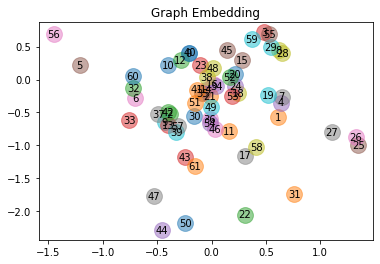

In [34]:
# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = G.nodes[node_name]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[-0.20928231  0.39689077]
 [ 0.613026   -0.57493441]
 [-0.38326149 -0.52378832]
 [ 0.48303006  0.71761631]
 [ 0.63799458 -0.3504409 ]
 [-1.21328686  0.22373884]
 [-0.69968399 -0.28019168]
 [ 0.64500961 -0.25787334]
 [ 0.61786571  0.44074781]
 [-0.42771847 -0.64621657]
 [-0.4016805   0.21629982]
 [ 0.16334674 -0.77772779]
 [-0.28344527  0.29545469]
 [-0.39999559 -0.68705839]
 [-0.04903724 -0.15283711]
 [ 0.2797662   0.29272152]
 [ 0.00936014 -0.06855918]
 [ 0.30637031 -1.15466468]
 [ 0.24543791 -0.20252308]
 [ 0.51886826 -0.23504544]
 [ 0.21166807  0.08378948]
 [-0.01637072 -0.25710918]
 [ 0.30847577 -2.0494318 ]
 [-0.10455424  0.21462637]
 [ 0.21945444 -0.0932794 ]
 [ 1.34816283 -0.99038836]
 [ 1.32785163 -0.87765348]
 [ 1.10475228 -0.79413006]
 [ 0.65230149  0.40304815]
 [ 0.54387033  0.48729164]
 [-0.15942954 -0.55913229]
 [ 0.76245814 -1.74416468]
 [-0.72044852 -0.13403835]
 [-0.75506371 -0.60900118]
 [ 0.04215149 -0.09387857]
 [-0.08535436 -0.20362477]
 [-0.01525

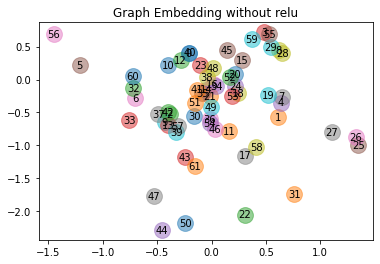

In [35]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')

# acting2:已经上交过，成绩top320